# 2.b.i Data inputation process

In [1]:
import numpy as np
from sklearn.preprocessing import Imputer
from scipy.stats import variation
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from collections import Counter
def data_process(path,flag):
    #2.b.i
    raw_data=[]
    raw_label=[]
    #raw_data_non_predictive=[]
    with open(path, encoding='utf8') as file:
        i=1
        for line in file:
            if i <21:
                i+=1
                continue
            if i==21:
                features=list(item1 for item1 in line.strip().split(','))[1:]
                i+=1
                continue
            data=[]
            for item in line.strip().split(','):
                if item=='na':
                    item='NaN'
                data.append(item)
            raw_data.append(data[1:])
            raw_label.append([0] if data[0]=='neg' else [1])
    raw_data=np.array(raw_data)
    imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imr = imr.fit(raw_data)
    imputed_data = imr.transform(raw_data)
    for i in range(len(imputed_data)):
        imputed_data[i] = [round(content,2) for content in imputed_data[i]]
    data=imputed_data
    if flag=='train':
        return data,raw_label,features
    else:
        return data, raw_label
train_data,train_label,features=data_process('./data/aps_failure_training_set.csv','train')
test_data,test_label=data_process('./data/aps_failure_test_set.csv','test')


# 2.b.ii Calculate the Coeﬃcient of Variation CV

In [3]:
def cal_cv(data):
    #2.b.ii
    print(variation(data, axis=0))
    return(variation(data, axis=0))
cv=cal_cv(train_data)

[  2.45091715   2.336447     2.16974844 183.84608814  23.19062019
  18.65854081  91.87778213  34.85466052  17.36899876   8.54997778
   5.40143368   2.92706769   2.34490753   2.83346048   6.15453179
  32.9840764    2.30016808  18.01253154  43.80145929  74.5260667
   9.0742952    9.05859612   2.23877812   2.26013028   3.05913881
   2.83958803  10.83391045  86.41615883  23.45922911  68.1599872
   5.77873587   3.87753489  37.00925384  52.23341641  38.80925691
  28.41330492  33.3744379   12.38403756   3.02306245   3.28421469
   3.77561604  83.78536609   9.32826672   7.64635585  13.14158345
   7.44591379   2.81711666   3.00804943   8.78083868  16.04744935
  22.42558125  76.96740734   2.68305412   2.60870996   2.87873171
   2.7160934    2.61599931   2.67985343   3.00724764   2.81034518
   6.75148906   9.32142229   2.39229943   6.94077789   5.12262995
   6.59664807   7.14856065   2.29781659   2.61276291   3.00252249
   3.55062183   0.73137229   0.73356539   0.59472086   0.51705632
   0.4625598

# 2.b.iii correlation matrix plot

In [4]:
def correlation_matrix(data):
    #2.b.iii
    #correlation matrix plot,返回关系矩阵
    print(np.corrcoef(data))
    return np.corrcoef(data)
correlation_matrix=correlation_matrix(train_data)


[[ 1.         -0.02707687 -0.02838921 ...  0.99993152  0.99983326
  -0.01173645]
 [-0.02707687  1.          0.85663593 ... -0.03781258 -0.02135633
   0.4616491 ]
 [-0.02838921  0.85663593  1.         ... -0.03716424 -0.02793859
   0.31329383]
 ...
 [ 0.99993152 -0.03781258 -0.03716424 ...  1.          0.99972369
  -0.01476282]
 [ 0.99983326 -0.02135633 -0.02793859 ...  0.99972369  1.
   0.00491489]
 [-0.01173645  0.4616491   0.31329383 ... -0.01476282  0.00491489
   1.        ]]


# 2.b.iv highest CV featurs

[122, 91, 109, 3, 136, 138, 6, 27, 41, 93, 51, 19, 29] ['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'ch_000', 'az_009', 'ak_000', 'au_000']


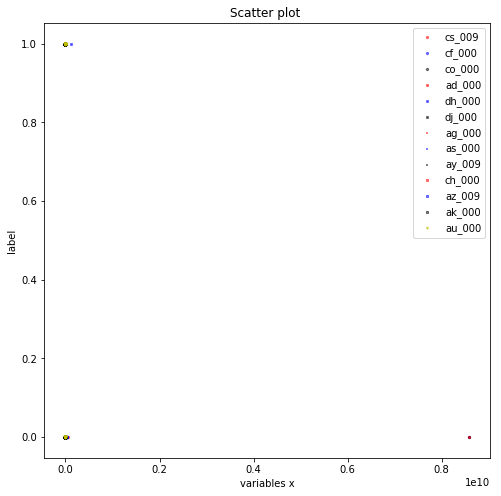

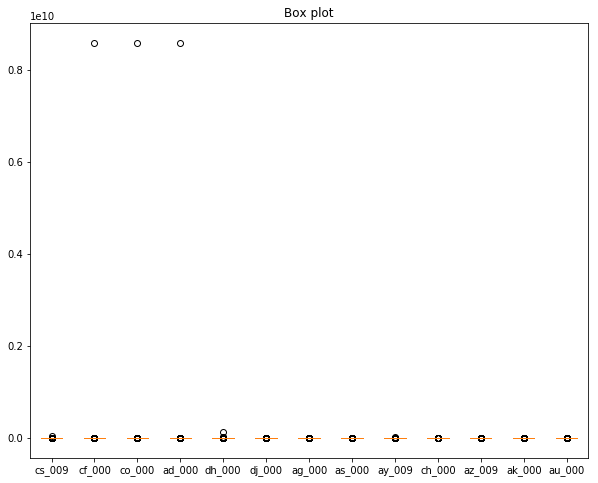

In [12]:
def plot(cv,data,label,input_feature):
    #2.b.iv
    #highest CV featurs
    features={}
    for i in range(len(input_feature)):
        features[i]=input_feature[i]
    cv_new={}
    for i in range(len(cv)):
        cv_new[i]=cv[i]
    cv_new=sorted(cv_new.items(),key=lambda x:x[1],reverse=True)
    key=[]
    feature=[]
    for i in range(13):
        key.append(cv_new[i][0])
        feature.append(features[cv_new[i][0]])
    print(key,feature)
    #Scatter plot
    plt.figure(figsize=(8,8))
    c=['r','b','k','r','b','k','r','b','k','r','b','k','y']
    marker=['o','o','o','X','X','X','+','+','+','s','s','s','v']
    for i in range(len(key)):
        plt.scatter(data[:, key[i]], np.array(label), s=5, c=c[i], marker=marker[i], alpha=0.5, label=feature[i])
    plt.title('Scatter plot ')
    plt.xlabel('variables x')
    plt.ylabel('label')
    plt.legend(loc='upper right')
    plt.show()

    #Box plot
    data_tmp=[]
    for id in key:
        data_tmp.append(data[:,id])
    data_tmp=np.array(data_tmp).T
    fig = plt.figure(figsize=(10,8))
    plt.boxplot(data_tmp, labels=feature, sym="o")
    plt.title('Box plot')
    plt.show()
plot(cv,train_data,train_label,features)


Answer 2.b.iv :Since we did not normalize the data, we could not draw a conclusion from the figure.
If we need to see the importance of features from the figure, the thief needs to normalize the features.

Answer 2.b.v:The data is imbalanced.

# 2.c

In [6]:
def tree_without_conpensate(data_train,data_test,label_train,label_test):
    #2.c
    clf = RandomForestClassifier(random_state=1113,oob_score=False)
    clf.fit(data_train, label_train)
    train_acc=(clf.score(data_train, label_train))
    test_acc=(clf.score(data_test, label_test))
    print('TRAIN_ACC is:', train_acc)
    print('TEST_ACC is:', test_acc)
    ypred = clf.predict(data_test)
    y_predict = (ypred >= 0.5) * 1
    auc = metrics.roc_auc_score(label_test, y_predict)
    confusion=metrics.confusion_matrix(label_test, y_predict)
    print('Confusion Matrix is :',confusion)
    print('AUC:',auc)
tree_mse=tree_without_conpensate(train_data,test_data,train_label,test_label)


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


TRAIN_ACC is: 0.9993833333333333
TEST_ACC is: 0.9906875
Confusion Matrix is : [[15605    20]
 [  129   246]]
AUC: 0.8273600000000001


# 2.d

In [7]:
def tree_with_conpensate(data_train,data_test,label_train,label_test):
    #2.d
    clf = RandomForestClassifier(random_state=1113,oob_score=False,class_weight='balanced')
    clf.fit(data_train, label_train)
    train_acc=(clf.score(data_train, label_train))
    test_acc=(clf.score(data_test, label_test))
    print('After data conpensate')
    print('TRAIN_ACC is:', train_acc)
    print('TEST_ACC is:', test_acc)
    ypred = clf.predict(data_test)
    y_predict = (ypred >= 0.5) * 1
    auc = metrics.roc_auc_score(label_test, y_predict)
    confusion = metrics.confusion_matrix(label_test, y_predict)
    print('Confusion Matrix is :', confusion)
    print('AUC:', auc)
tree_mse_new=tree_with_conpensate(train_data,test_data,train_label,test_label)


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


After data conpensate
TRAIN_ACC is: 0.999
TEST_ACC is: 0.9876875
Confusion Matrix is : [[15608    17]
 [  180   195]]
AUC: 0.759456


# 2.e choose 10fold

In [8]:
def Logistic_tree_mode(data_train,data_test,label_train,label_test):
    #2.e choose 10fold
    data = np.array(data_train)
    mark = np.array(label_train)
    train_acc=[]
    test_acc=[]
    train_auc=[]
    test_auc=[]
    for i in range(10):
        head = int((len(mark) / 10) * i)
        tail = int((len(mark) / 10) * (i + 1))
        x_train = np.vstack((data[0:head], data[tail:]))
        y_train = np.vstack((mark[0:head], mark[tail:]))
        x_test = np.array(data[head:tail])
        y_test = np.array(mark[head:tail])
        try:
            dtrain = xgb.DMatrix(x_train, label=y_train)
            dtrain_new = xgb.DMatrix(x_train)
            dtest = xgb.DMatrix(x_test)
            params = {'booster': 'gbtree',
                      'objective': 'binary:logistic',
                      'seed': 1113,
                      'selent':1}
            model = xgb.train(params, dtrain)

            y_trainpred=model.predict(dtrain_new)
            y_train_pred=(y_trainpred >= 0.5) * 1
            ypred = model.predict(dtest)
            y_pred = (ypred >= 0.5) * 1

            train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
            train_auc.append(metrics.roc_auc_score(y_train, y_train_pred))

            test_acc.append(metrics.accuracy_score(y_test, y_pred))
            test_auc.append(metrics.roc_auc_score(y_test, y_pred))
        except:
            continue

    print('Train data after 10 fold ACC is:',sum(train_acc)/len(train_acc))
    print('Train data after 10 fold AUC is:',sum(train_auc)/len(train_auc))
    print('Test data after 10 fold ACC is:',sum(test_acc)/len(test_acc))
    print('Test data after 10 fold AUC is:',sum(test_auc)/len(test_auc))
Logistic_tree_mode(train_data,test_data,train_label,test_label)

[11:14:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[11:14:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[11:14:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[11:14:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[11:14:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[11:14:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[11:14:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[11:14:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[11:14:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_

# 2.f

In [11]:
from imblearn.over_sampling import SMOTE
def Smote_process(data_train,data_test,label_train,label_test):
    sm = SMOTE(random_state=1113)
    x_new, y_new = sm.fit_resample(data_train, label_train)
    print('Resampled dataset shape %s' % Counter(y_new))
    data = np.array(x_new)
    mark = np.array([[item] for item in y_new])
    train_acc = []
    test_acc = []
    train_auc = []
    test_auc = []
    for i in range(10):
        head = int((len(mark) / 10) * i)
        tail = int((len(mark) / 10) * (i + 1))

        x_train = np.vstack((data[0:head], data[tail:]))
        y_train = np.vstack((mark[0:head], mark[tail:]))

        x_test = np.array(data[head:tail])
        y_test = np.array(mark[head:tail])
        try:
            dtrain = xgb.DMatrix(x_train, label=y_train)
            dtrain_new = xgb.DMatrix(x_train)
            dtest = xgb.DMatrix(x_test)
            params = {'booster': 'gbtree',
                      'objective': 'binary:logistic',
                      'seed': 1113,
                      'selent': 1}
            model = xgb.train(params, dtrain)

            y_trainpred = model.predict(dtrain_new)
            y_train_pred = (y_trainpred >= 0.5) * 1
            ypred = model.predict(dtest)
            y_pred = (ypred >= 0.5) * 1

            train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
            train_auc.append(metrics.roc_auc_score(y_train, y_train_pred))

            test_acc.append(metrics.accuracy_score(y_test, y_pred))
            test_auc.append(metrics.roc_auc_score(y_test, y_pred))
        except:
            continue

    print('With Smote, Train data after 10 fold ACC is:', sum(train_acc) / len(train_acc))
    print('With Smote, Train data after 10 fold AUC is:', sum(train_auc) / len(train_auc))
    print('With Smote, Test data after 10 fold ACC is:', sum(test_acc) / len(test_acc))
    print('With Smote, Test data after 10 fold AUC is:', sum(test_auc) / len(test_auc))
Smote_process(train_data,test_data,train_label,test_label)


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampled dataset shape Counter({0: 59000, 1: 59000})
[11:30:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[11:30:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[11:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[11:30:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[11:30:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:30:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[11:30:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:30:11] src/tree/updater_prune.cc:74: t

Train data after 10 fold ACC is: 0.9968296296296296
Train data after 10 fold AUC is: 0.9113282411586436
Test data after 10 fold ACC is: 0.993
Test data after 10 fold AUC is: 0.8342898552009761
    
With Smote, Train data after 10 fold ACC is: 0.9894444444444443
With Smote, Train data after 10 fold AUC is: 0.9892908446126146
With Smote, Test data after 10 fold ACC is: 0.9860000000000001
With Smote, Test data after 10 fold AUC is: 0.9651814072236209

Conclusion: With Smote, the model performances better on both train data and test data.